## Charlotte Hornets vs Chicago Bulls - 23.10.2019 NBA Regular Season Game
#### Ryszard Staruch

In [135]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import plotly.express as px
from io import StringIO
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', None)

In [136]:
df = pd.read_csv("2019-20_pbp.csv")
df = df[df["Date"] == "October 23 2019"]
df = df[df["URL"] == "/boxscores/201910230CHO.html"]

df["Total_time_end"] = 48 - ((4 - df["Quarter"]) * 720 + df["SecLeft"]) / 60
df["Score"] = df["HomeScore"] - df["AwayScore"]
df_scores = df[df["ShotOutcome"] == "make"]

df_scores["Total_time_start"] = 0
last_index = df_scores.index[0]
for x in range(1, len(df_scores)):
    current_index = df_scores.index[x]
    df_scores.at[current_index, "Total_time_start"] = df_scores.at[last_index, "Total_time_end"]
    last_index = current_index

df_scores["Play"] = df_scores["HomePlay"].notna()


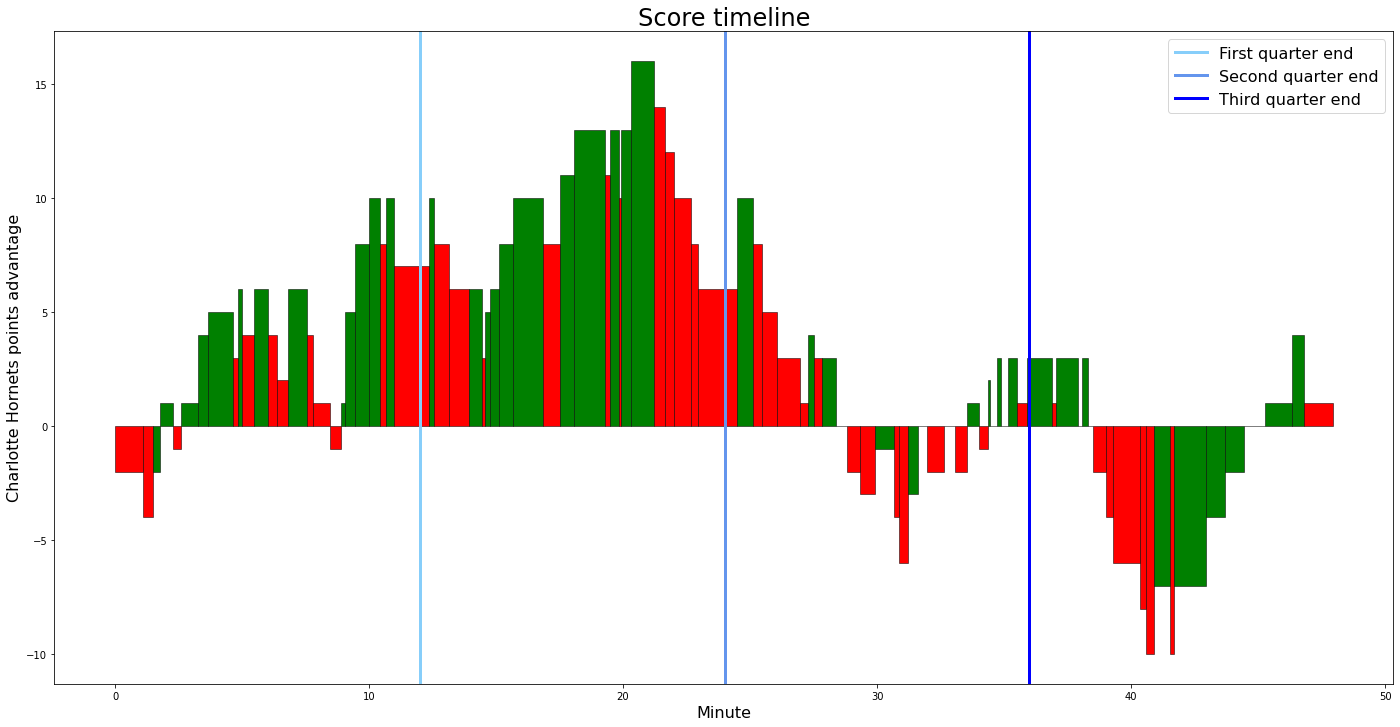

In [137]:
colors = {True:'green', False:'red'}
fig = plt.figure(figsize=(24, 12))
ax = fig.gca()

plt.axvline(x=12, color='lightskyblue', label='First quarter end', lw=3)
plt.axvline(x=24, color='cornflowerblue', label='Second quarter end', lw=3)
plt.axvline(x=36, color='b', label='Third quarter end', lw=3)
plt.legend(fontsize=16)
plt.xlabel("Minute", fontsize=16)
plt.ylabel("Charlotte Hornets points advantage", fontsize=16)
plt.title("Score timeline",fontsize=24)

for index, row in df_scores.iterrows():
    x = (row.Total_time_start, row.Total_time_end)
    h = row.Score    
    ax.fill_between(x, 0, h, color=colors[row.Play], edgecolor=(0, 0, 0), lw=0.5)


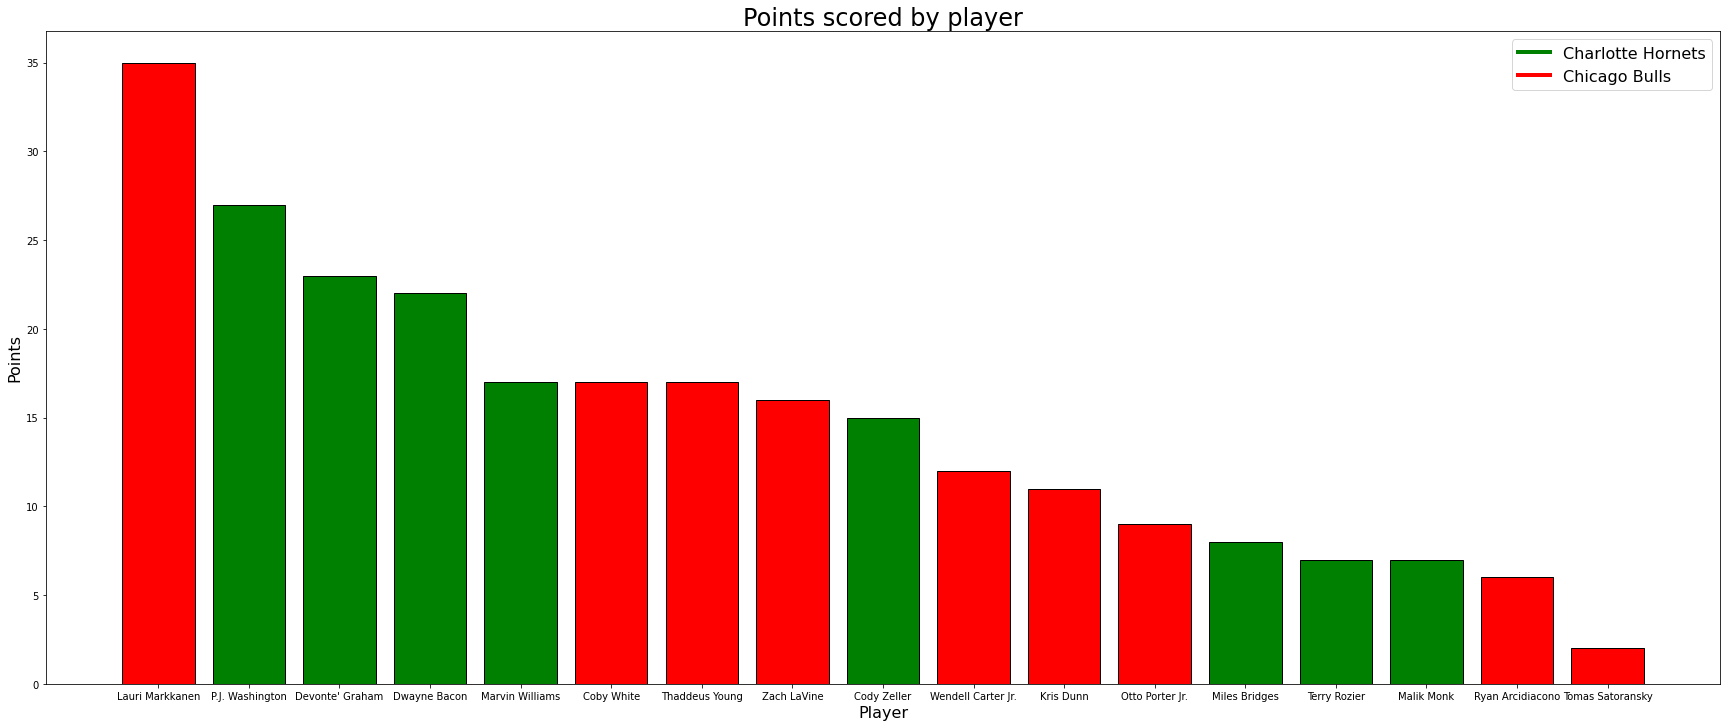

In [140]:
colors = {'Charlotte':'green', 'Chicago':'red'}

df_details = pd.read_csv("games_details.csv")
df_details = df_details[df_details["GAME_ID"] == 21900003]
df_details = df_details.sort_values(by="PTS", ascending=False)
df_details = df_details[df_details["PTS"] > 0]
plt.figure(figsize=(30, 12))
plt.title("Points scored by player", fontsize=24)
plt.xlabel("Player", fontsize=16)
plt.ylabel("Points", fontsize=16)
plt.bar(df_details["PLAYER_NAME"], df_details["PTS"], color=df_details['TEAM_CITY'].map(colors), edgecolor="black", label=df_details['TEAM_CITY'].map(colors))

custom_lines = [Line2D([0], [0], color="green",lw=4), Line2D([0], [0], color="red", lw=4)]
plt.legend(custom_lines, ['Charlotte Hornets', 'Chicago Bulls'], fontsize=16);

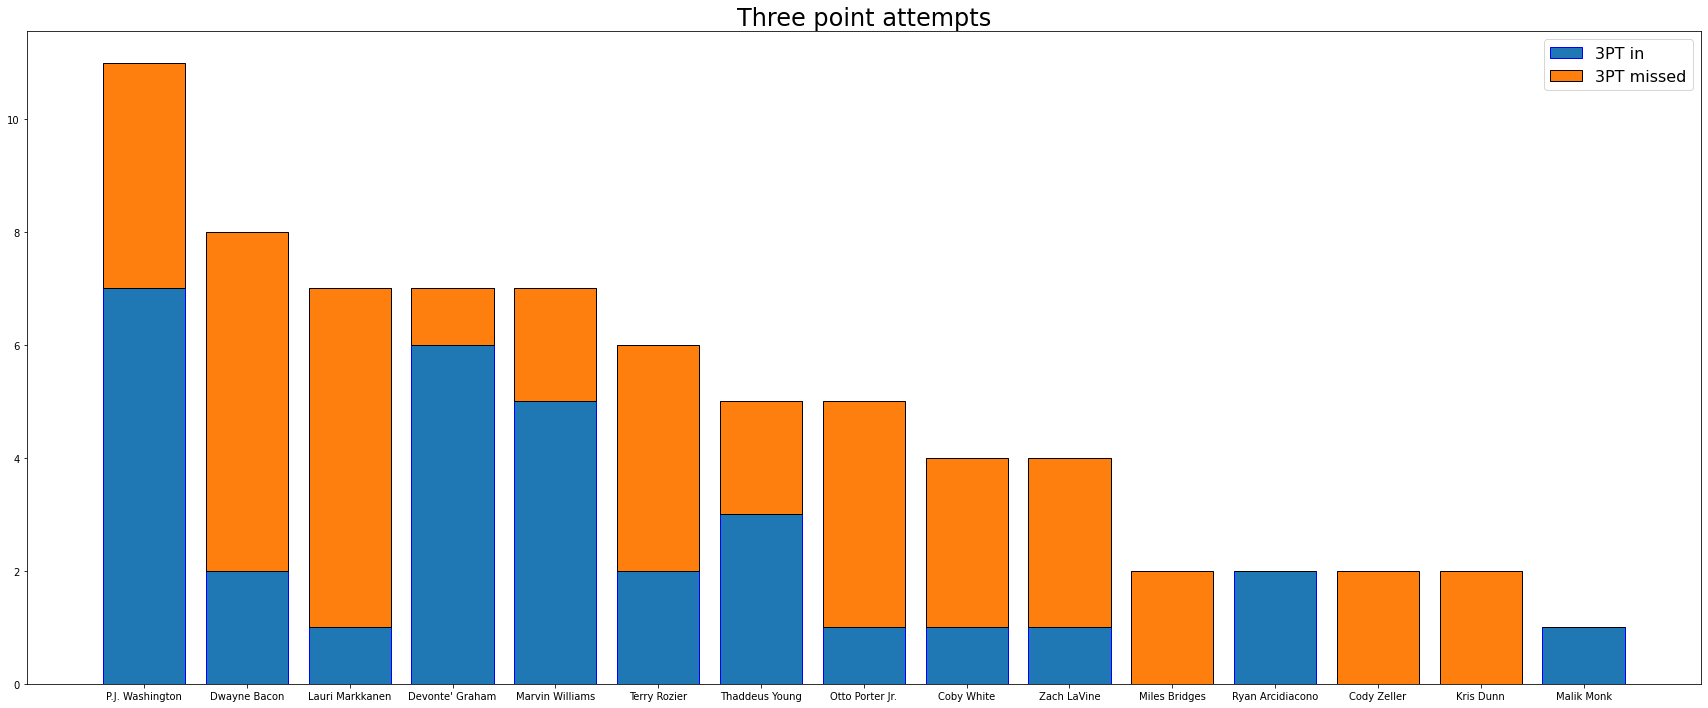

In [139]:
df_details = df_details.sort_values(by="FG3A", ascending=False)
df_details = df_details[df_details["FG3A"] > 0]
df_details["FG3Missed"] = df_details["FG3A"] - df_details["FG3M"]

fig, ax = plt.subplots()
fig.set_size_inches(30, 12, forward=True)
ax.bar(df_details["PLAYER_NAME"], df_details["FG3M"], label='3PT in', edgecolor="b")
ax.bar(df_details["PLAYER_NAME"], df_details["FG3Missed"], label='3PT missed', bottom=df_details["FG3M"], edgecolor="black")

ax.set_title('Three point attempts', fontsize=24)
ax.legend(fontsize=16)
plt.show()